<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model Perdiction-Part IV Feature Eng. & Selection with Imbalanced Techniques

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Importing Pickel file tmdb_filtered

In [1]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_clean = pickle.load(file)
    print(f"tmdb_filtered loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_filtered
    # For example, you can display the first few rows:
    print(tmdb_clean.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive
tmdb_filtered loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl successfully.
              name        id  number_of_seasons  number_of_episodes  \
0          minutes   39280.0                  0                   0   
1              man  222838.6                  1                   5   
2   erne tur retur  222838.6                  1                  10   
3                    34835.0                  1                  12   
4             bama   42598.0                  0                   0   

   vote_count  vote_average first_air_date last_air_date  popularity  \
0           0           0.0            NaT           NaT    0.470004   
1           3           7.7     2023-05-28    2023-06-25    1.723837   
2           0           0.0     2014-05-15    2014-07-17    0.470004   
3          10           6.4     2006-10-06    2006-12-22    2.375928   
4           0           0.0            NaT           NaT    0.470004   

 

# The tmdb_filtered Analysis

In [2]:
tmdb_clean.head(10)

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time,adult_True,air_time
0,minutes,39280.00,0,0,0,0.0,NaT,NaT,0.470004,Scripted,Drama,Shotaro Ishinomori,en,other,US,other,30,0,49.0
1,man,222838.60,1,5,3,7.7,2023-05-28,2023-06-25,1.723837,Scripted,Drama,Shuichi Okita,ja,WOWOW Prime,JP,other,50,0,28.0
2,erne tur retur,222838.60,1,10,0,0.0,2014-05-15,2014-07-17,0.470004,Scripted,Drama,Shotaro Ishinomori,en,other,DK,other,0,0,63.0
3,,34835.00,1,12,10,6.4,2006-10-06,2006-12-22,2.375928,Scripted,other,Shotaro Ishinomori,ja,other,JP,other,30,0,77.0
4,bama,42598.00,0,0,0,0.0,NaT,NaT,0.470004,Scripted,Comedy,Shotaro Ishinomori,en,other,US,other,0,0,49.0
5,,5623.55,0,0,0,0.0,NaT,NaT,0.470004,Scripted,Drama,Shotaro Ishinomori,en,CBC Television,CA,other,0,0,49.0
6,,53608.00,0,0,0,0.0,NaT,NaT,0.470004,Scripted,Drama,Shotaro Ishinomori,ar,other,EG,other,0,0,49.0
7,,222838.60,1,3,0,0.0,2021-08-30,2021-09-01,0.622725,Documentary,Documentary,Shotaro Ishinomori,en,other,US,other,0,0,2.0
8,nt,57291.00,0,0,0,0.0,NaT,NaT,0.470004,Scripted,Drama,Shotaro Ishinomori,en,other,US,other,0,0,49.0
9,s_wr,60387.00,0,1,0,0.0,NaT,2013-10-06,0.470004,Scripted,Drama,Shotaro Ishinomori,en,other,US,other,0,0,49.0


# Dataset tmdb.filtered Describe

In [3]:
tmdb_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
id,78501.0,80183.4633,5623.55,29936.0,60254.0,112207.0,222838.6,64247.889147
number_of_seasons,78501.0,0.900957,0.0,1.0,1.0,1.0,3.0,0.669204
number_of_episodes,78501.0,13.593254,0.0,1.0,6.0,16.0,92.0,20.306675
vote_count,78501.0,2.632629,0.0,0.0,0.0,1.0,29.0,6.553333
vote_average,78501.0,2.641944,0.0,0.0,0.0,6.5,9.0,3.483537
first_air_date,58633,2006-10-18 05:57:13.117868800,1921-01-01 00:00:00,2000-10-14 00:00:00,2010-10-29 00:00:00,2017-12-28 00:00:00,2024-04-23 00:00:00,NaN
last_air_date,59105,2007-06-12 14:10:33.083495424,1921-07-09 00:00:00,2001-09-20 00:00:00,2011-05-20 00:00:00,2018-06-07 00:00:00,2024-04-04 00:00:00,NaN
popularity,78501.0,1.003305,0.470004,0.470004,0.644482,1.289783,3.102879,0.735652
episode_run_time,78501.0,24.716666,0.0,0.0,25.0,45.0,70.0,24.165623
adult_True,78501.0,0.016981,0.0,0.0,0.0,0.0,1.0,0.1292


In [4]:
tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78501 entries, 0 to 82871
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  78501 non-null  object        
 1   id                    78501 non-null  float64       
 2   number_of_seasons     78501 non-null  int64         
 3   number_of_episodes    78501 non-null  int64         
 4   vote_count            78501 non-null  int64         
 5   vote_average          78501 non-null  float64       
 6   first_air_date        58633 non-null  datetime64[ns]
 7   last_air_date         59105 non-null  datetime64[ns]
 8   popularity            78501 non-null  float64       
 9   type                  78501 non-null  object        
 10  genres                78501 non-null  object        
 11  created_by            78501 non-null  object        
 12  languages             78501 non-null  object        
 13  networks             

In [5]:
tmdb_clean.agg('count')

,0
name,78501
id,78501
number_of_seasons,78501
number_of_episodes,78501
vote_count,78501
vote_average,78501
first_air_date,58633
last_air_date,59105
popularity,78501
type,78501


# Analizing  DataSet tmdb_clean

<ipython-input-6-2c966223017d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmdb_clean['log_popularity'], kde=True)  # kde=True shows the kernel density estimate


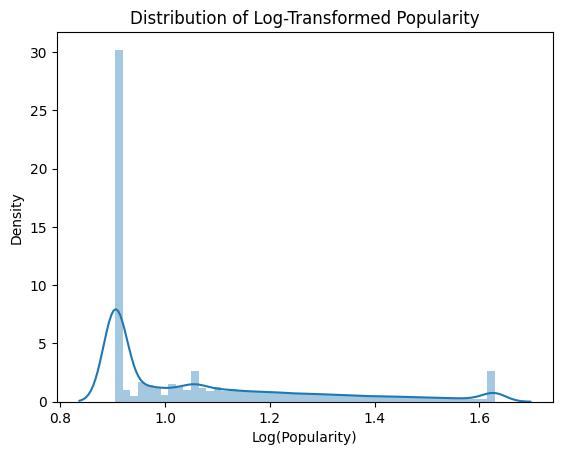

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Using  tmdb_clean as the  DataFrame

# Apply log transformation to 'popularity' and handle potential zeros or negative values
tmdb_clean['log_popularity'] = np.log1p(1+tmdb_clean['popularity'])  # log1p(x) = log(1 + x)

# Create the distplot
sns.distplot(tmdb_clean['log_popularity'], kde=True)  # kde=True shows the kernel density estimate
plt.title('Distribution of Log-Transformed Popularity')
plt.xlabel('Log(Popularity)')
plt.ylabel('Density')
plt.show()


# Feature Eng. & Selection
Enriching: Create new features from existing ones

In [7]:
tmdb_eng=tmdb_clean.copy()
tmdb_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78501 entries, 0 to 82871
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  78501 non-null  object        
 1   id                    78501 non-null  float64       
 2   number_of_seasons     78501 non-null  int64         
 3   number_of_episodes    78501 non-null  int64         
 4   vote_count            78501 non-null  int64         
 5   vote_average          78501 non-null  float64       
 6   first_air_date        58633 non-null  datetime64[ns]
 7   last_air_date         59105 non-null  datetime64[ns]
 8   popularity            78501 non-null  float64       
 9   type                  78501 non-null  object        
 10  genres                78501 non-null  object        
 11  created_by            78501 non-null  object        
 12  languages             78501 non-null  object        
 13  networks             

In [8]:
import pandas as pd

# Assuming tmdb_eng is your DataFrame

# 1. Average episode runtime per number_of_seasons:
tmdb_eng['avg_episode_runtime_per_number_of_seasons'] = tmdb_eng['episode_run_time'] / tmdb_eng['number_of_seasons']

# 2. Total runtime of the show:
tmdb_eng['total_runtime'] = tmdb_eng['episode_run_time'] * tmdb_eng['number_of_episodes']

# 3. Production company count:
# Convert to string before using str accessor
tmdb_eng['production_company_count'] = tmdb_eng['production_companies'].astype(str).str.split(',').str.len()

# 4. Network count:
# Convert to string before using str accessor
tmdb_eng['network_count'] = tmdb_eng['networks'].astype(str).str.split(',').str.len()

# 5. Genre count:
# Convert to string before using str accessor
tmdb_eng['genre_count'] = tmdb_eng['genres'].astype(str).str.split(',').str.len()

# 6. Origin country count (if multiple):
# Convert to string before using str accessor
tmdb_eng['origin_country_count'] = tmdb_eng['origin_country'].astype(str).str.split(',').str.len()

# 7. Created by count (if multiple):
# Convert to string before using str accessor
tmdb_eng['created_by_count'] = tmdb_eng['created_by'].astype(str).str.split(',').str.len()


# Display the updated DataFrame with new features
tmdb_eng.head()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,...,adult_True,air_time,log_popularity,avg_episode_runtime_per_number_of_seasons,total_runtime,production_company_count,network_count,genre_count,origin_country_count,created_by_count
0,minutes,39280.0,0,0,0,0.0,NaT,NaT,0.470004,Scripted,...,0,49.0,0.904220,inf,0,1,1,1,1,1
1,man,222838.6,1,5,3,7.7,2023-05-28,2023-06-25,1.723837,Scripted,...,0,28.0,1.314755,50.0,250,1,1,1,1,1
2,erne tur retur,222838.6,1,10,0,0.0,2014-05-15,2014-07-17,0.470004,Scripted,...,0,63.0,0.904220,0.0,0,1,1,1,1,1
3,,34835.0,1,12,10,6.4,2006-10-06,2006-12-22,2.375928,Scripted,...,0,77.0,1.476119,30.0,360,1,1,1,1,1
4,bama,42598.0,0,0,0,0.0,NaT,NaT,0.470004,Scripted,...,0,49.0,0.904220,NaN,0,1,1,1,1,1


# Normalization/Standardization:
Scale numerical features to ensure they have similar ranges,

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Using tmdb_eng as  DataFrame

# Select numerical features for scaling
numerical_features = ['number_of_episodes', 'number_of_seasons', 'vote_count', 'vote_average', 'popularity',
                      'episode_run_time', 'avg_episode_runtime_per_number_of_seasons', 'total_runtime',
                      'production_company_count', 'network_count', 'genre_count', 'origin_country_count',
                      'created_by_count']

# Replace infinite values with NaN
tmdb_eng[numerical_features] = tmdb_eng[numerical_features].replace([np.inf, -np.inf], np.nan)

# Impute NaN values (if any) with the median of the column
# (You can also use other strategies like mean or a constant value)
for feature in numerical_features:
    tmdb_eng[feature] = tmdb_eng[feature].fillna(tmdb_eng[feature].median())

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the selected numerical features and transform them
tmdb_eng[numerical_features] = scaler.fit_transform(tmdb_eng[numerical_features])

# Display the updated DataFrame with scaled features
tmdb_eng.head()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,...,adult_True,air_time,log_popularity,avg_episode_runtime_per_number_of_seasons,total_runtime,production_company_count,network_count,genre_count,origin_country_count,created_by_count
0,minutes,39280.0,-1.346320,-0.669403,-0.401726,-0.758413,NaT,NaT,-0.724942,Scripted,...,0,49.0,0.904220,-0.068351,-0.503073,0.0,-0.036247,-0.444372,-0.114937,-0.228075
1,man,222838.6,0.148003,-0.423177,0.056059,1.451998,2023-05-28,2023-06-25,0.979452,Scripted,...,0,28.0,1.314755,1.212566,-0.173808,0.0,-0.036247,-0.444372,-0.114937,-0.228075
2,erne tur retur,222838.6,0.148003,-0.176951,-0.401726,-0.758413,2014-05-15,2014-07-17,-0.724942,Scripted,...,0,63.0,0.904220,-1.250737,-0.503073,0.0,-0.036247,-0.444372,-0.114937,-0.228075
3,,34835.0,0.148003,-0.078460,1.124225,1.078811,2006-10-06,2006-12-22,1.865870,Scripted,...,0,77.0,1.476119,0.227245,-0.028931,0.0,-0.036247,-0.444372,-0.114937,-0.228075
4,bama,42598.0,-1.346320,-0.669403,-0.401726,-0.758413,NaT,NaT,-0.724942,Scripted,...,0,49.0,0.904220,-0.068351,-0.503073,0.0,-0.036247,-0.444372,-0.114937,-0.228075


# Multivariable Analysis
**Summarization and Selection of Variables**

The Lasso penalty here is controlled by alpha = 0.01. This penalty forces some coefficients to shrink to zero, effectively performing feature selection. A higher penalty (larger alpha) would result in more coefficients being zeroed out, and a lower penalty (smaller alpha) would retain more features

# Clean episode_run_time:

The str.replace('minutes', '').str.strip() line removes the string "minutes" and any leading/trailing spaces from the episode_run_time column.
The pd.to_numeric(..., errors='coerce').fillna(0) line converts the cleaned values to numeric. If there are any errors during the conversion (due to invalid characters), it replaces them with NaN, which are then filled with 0. This ensures that the column contains only numerical values.

In [14]:
import pandas as pd
import numpy as np

# Using 'tmdb_eng' DataFrame

# 1. Clean 'episode_run_time' before feature engineering:
# Convert 'episode_run_time' to string type before using .str accessor
tmdb_eng['episode_run_time'] = tmdb_eng['episode_run_time'].astype(str)  # Convert to string

tmdb_eng['episode_run_time'] = tmdb_eng['episode_run_time'].str.replace('minutes', '').str.strip()
tmdb_eng['episode_run_time'] = pd.to_numeric(tmdb_eng['episode_run_time'], errors='coerce').fillna(0)


# 2. Proceed with feature engineering:
# 1. Average episode runtime per number_of_seasons:
tmdb_eng['avg_episode_runtime_per_number_of_seasons'] = tmdb_eng['episode_run_time'] / tmdb_eng['number_of_seasons']

# 2. Total runtime of the show:
tmdb_eng['total_runtime'] = tmdb_eng['episode_run_time'] * tmdb_eng['number_of_episodes']

# 3. Production company count:
# Convert to string before using str accessor
tmdb_eng['production_company_count'] = tmdb_eng['production_companies'].astype(str).str.split(',').str.len()

# 4. Network count:
# Convert to string before using str accessor
tmdb_eng['network_count'] = tmdb_eng['networks'].astype(str).str.split(',').str.len()

# 5. Genre count:
# Convert to string before using str accessor
tmdb_eng['genre_count'] = tmdb_eng['genres'].astype(str).str.split(',').str.len()

# 6. Origin country count (if multiple):
# Convert to string before using str accessor
tmdb_eng['origin_country_count'] = tmdb_eng['origin_country'].astype(str).str.split(',').str.len()

# 7. Created by count (if multiple):
# Convert to string before using str accessor
tmdb_eng['created_by_count'] = tmdb_eng['created_by'].astype(str).str.split(',').str.len()


# Display the updated DataFrame with new features
tmdb_eng.head()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,...,adult_True,air_time,log_popularity,avg_episode_runtime_per_number_of_seasons,total_runtime,production_company_count,network_count,genre_count,origin_country_count,created_by_count
0,minutes,39280.0,-1.346320,-0.669403,-0.401726,-0.758413,NaT,NaT,-0.724942,Scripted,...,0,49.0,0.904220,-0.162392,-0.146353,1,1,1,1,1
1,man,222838.6,0.148003,-0.423177,0.056059,1.451998,2023-05-28,2023-06-25,0.979452,Scripted,...,0,28.0,1.314755,7.069187,-0.442752,1,1,1,1,1
2,erne tur retur,222838.6,0.148003,-0.176951,-0.401726,-0.758413,2014-05-15,2014-07-17,-0.724942,Scripted,...,0,63.0,0.904220,-6.910747,0.180987,1,1,1,1,1
3,,34835.0,0.148003,-0.078460,1.124225,1.078811,2006-10-06,2006-12-22,1.865870,Scripted,...,0,77.0,1.476119,1.477213,-0.017154,1,1,1,1,1
4,bama,42598.0,-1.346320,-0.669403,-0.401726,-0.758413,NaT,NaT,-0.724942,Scripted,...,0,49.0,0.904220,0.759707,0.684671,1,1,1,1,1


In [19]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor # Changed to Regressors
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Import LinearSVR for regression tasks
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge




# 1. Clean 'episode_run_time' before feature engineering:
# Convert 'episode_run_time' to string type before using .str accessor

tmdb_eng['episode_run_time'] = tmdb_eng['episode_run_time'].astype(str)  # Convert to string

# Remove any non-digit characters and convert to numeric

tmdb_eng['episode_run_time'] = tmdb_eng['episode_run_time'].str.replace(r'\D+', '', regex=True)
tmdb_eng['episode_run_time'] = pd.to_numeric(tmdb_eng['episode_run_time'], errors='coerce').fillna(0)

# Using 'tmdb_eng'  DataFrame containing the features and target variable
# Replace 'target_variable_column' with the actual name of your target variable column

X = tmdb_eng.drop(columns=['popularity'])  # Features (all columns except the target)
y = tmdb_eng['popularity']  # Target variable

# Ensure all columns in X are numeric This will convert any remaining non-numeric columns to numeric,
# replacing non-convertible values with NaN Then, it will impute NaN values with 0.

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'datetime64[ns]': # Check for object and datetime types
        try:
            X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0) # Convert to numeric, handle errors and fill NaNs with 0
        except (ValueError, TypeError):
            X[col] = pd.factorize(X[col])[0] # Use factorize for non-numeric columns


# Fit models and determine if a feature is selected (1) or not (0)
lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

# Fit Ridge model
ridge = Ridge(alpha=0.01).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)

# Use LinearSVR for regression with continuous target
svm = LinearSVR(C=0.01).fit(X, y)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

gb = GradientBoostingRegressor().fit(X, y) # Changed to Regressor
gb_selected = (gb.feature_importances_ > 0).astype(int)

rf = RandomForestRegressor().fit(X, y) # Changed to Regressor
rf_selected = (rf.feature_importances_ > 0).astype(int)

# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'Ridge': ridge_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso', 'SVM', 'GradientBoost', 'RandomForest','Ridge']].sum(axis=1)

# Output the results
print(selection_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.789e+03, tolerance: 7.850e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.13815e-45): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                                      Feature  Lasso  SVM  GradientBoost  \
0                                        name      0    0              0   
1                                          id      1    0              0   
2                           number_of_seasons      0    0              0   
3                          number_of_episodes      1    0              0   
4                                  vote_count      1    0              0   
5                                vote_average      0    0              0   
6                              first_air_date      1    0              0   
7                               last_air_date      1    0              0   
8                                        type      0    0              0   
9                                      genres      0    0              0   
10                                 created_by      0    0              0   
11                                  languages      0    0              0   
12          

# Creating DataFrame with most valuable variables

Selected variables - recommended by 3 or more models

In [20]:
 #Selecting variables with a sum of selections >= 3

final_var = selection_df[selection_df['Sum'] >= 3]['Feature'].tolist()
tmdb_model = tmdb_eng[final_var].copy()
tmdb_model['popularity'] = tmdb_eng['popularity'].copy()

# Output the result to verify
tmdb_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78501 entries, 0 to 82871
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  78501 non-null  float64       
 1   number_of_episodes  78501 non-null  float64       
 2   vote_count          78501 non-null  float64       
 3   first_air_date      58633 non-null  datetime64[ns]
 4   last_air_date       59105 non-null  datetime64[ns]
 5   episode_run_time    78501 non-null  int64         
 6   air_time            78501 non-null  float64       
 7   log_popularity      78501 non-null  float64       
 8   popularity          78501 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 6.0 MB


# Imbalance Techniques

In machine learning, class imbalance occurs when one class (the majority class) has significantly more instances than another class (the minority class) in your dataset. This can be a problem because many machine learning algorithms are designed to maximize overall accuracy, which can lead to them prioritizing the majority class and neglecting the minority class.



In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression  # Or any other classifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Define a binary target based on 'popularity' (Adjust the threshold as needed)
median_popularity = tmdb_model['popularity'].median()
tmdb_model['success'] = (tmdb_model['popularity'] > median_popularity).astype(int)

# 2. Define features (X) and target (y)
X = tmdb_model.drop(columns=['popularity', 'success'])
y = tmdb_model['success']

# Convert datetime columns to numerical representation (e.g., Unix timestamp)
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype(np.int64) // 10**9  # Convert to Unix timestamp

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define resampling techniques
techniques = {
    "ROS": RandomOverSampler(random_state=42),
    "RUS": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# 5. Apply resampling and train a model
for technique_name, technique in techniques.items():
    # Resample the training data
    X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)

    # Initialize and train the model (e.g., Logistic Regression)
    model = LogisticRegression(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Results for {technique_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n")

Results for ROS:
Accuracy: 0.7353
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.50      0.65      7826
           1       0.66      0.97      0.79      7875

    accuracy                           0.74     15701
   macro avg       0.80      0.73      0.72     15701
weighted avg       0.80      0.74      0.72     15701


Results for RUS:
Accuracy: 0.7353
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.50      0.65      7826
           1       0.66      0.97      0.79      7875

    accuracy                           0.74     15701
   macro avg       0.80      0.73      0.72     15701
weighted avg       0.80      0.74      0.72     15701


Results for SMOTE:
Accuracy: 0.7353
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.50      0.65      7826
           1       0.66      0.97      0.79      7875

    acc

# Download & Save tmdb_model to my Google Drive

In [23]:
# Import necessary libraries
import pickle
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_ready DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_model, file)
  print(f"tmdb_model saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_eng is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_model saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl


#Importing Pickel file tmdb_model from my Google Drive

In [24]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl'

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_model = pickle.load(file)
    print(f"tmdb_model loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_model)
    # For example, you can display the first few rows:
    print(tmdb_model.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_model loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl successfully.
         id  number_of_episodes  vote_count first_air_date last_air_date  \
0   39280.0           -0.669403   -0.401726            NaT           NaT   
1  222838.6           -0.423177    0.056059     2023-05-28    2023-06-25   
2  222838.6           -0.176951   -0.401726     2014-05-15    2014-07-17   
3   34835.0           -0.078460    1.124225     2006-10-06    2006-12-22   
4   42598.0           -0.669403   -0.401726            NaT           NaT   

    episode_run_time  air_time  log_popularity  popularity  success  
0   2186315472863904      49.0        0.904220   -0.724942        0  
1  10462587558510787      28.0        1.314755    0.979452        1  
2   1022809265560642      63.0        0.904220   -0.724942        0  
3   2186315472863904    